<a href="https://colab.research.google.com/github/SharmaAshwini/UNT/blob/main/Machine%20Learning/Assignment_4_Model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Student name: Ashwini Sharma
## Assignment: Model evaluation

In [ ]:
!gdown '1Xk2FRvFRwyRBxCJ9F8-EXE6tXscgkj7D'

Downloading...
From: https://drive.google.com/uc?id=1Xk2FRvFRwyRBxCJ9F8-EXE6tXscgkj7D
To: /content/fetal_health.csv
100% 229k/229k [00:00<00:00, 46.2MB/s]


In [ ]:
"""
Read the data stored in your local machine https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification
"""

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
np.random.seed= 20

df = pd.read_csv('fetal_health.csv')
X = df.drop(columns='fetal_health')
y = df['fetal_health']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)

### Part 1: Perform classification task using 5 different models (75 pts)

###### For each model (except Naive Bayes), use GridSearchCV() to tune the hyperparameters (note: testing ranges are specified in the assignment description)

###### Logistic Regression with L1 penalty (Lasso) (15 pts)

In [ ]:
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=0,  penalty="l1", solver='liblinear', multi_class="ovr")
lr_clf.fit(X_train, y_train)

y_pred = lr_clf.predict(X_test)
score = lr_clf.score(X_test, y_test)

print(score)

0.8896713615023474


[[322   5   5]
 [ 29  30   0]
 [  2   6  27]]


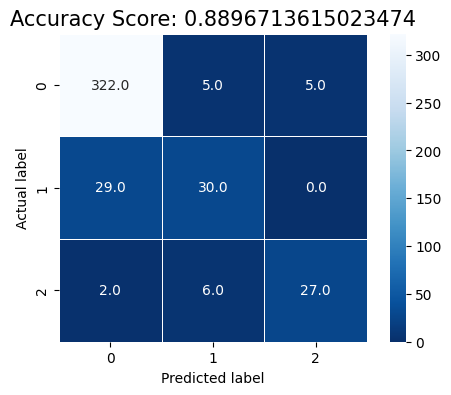

              precision    recall  f1-score   support

         1.0       0.91      0.97      0.94       332
         2.0       0.73      0.51      0.60        59
         3.0       0.84      0.77      0.81        35

    accuracy                           0.89       426
   macro avg       0.83      0.75      0.78       426
weighted avg       0.88      0.89      0.88       426



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test, y_pred))

In [ ]:
C = [] #C: from 0.1 to 1, step = 0.3
i = 0.1
while i<=1:
  C.append(round(i,1))
  i += 0.3

C

[0.1, 0.4, 0.7, 1.0]

In [ ]:
#Grid search

# Define the logistic regression model
lr_clf = LogisticRegression()
#random_state=0

#creating Parameter grid
param_grid = {'C': C,                  #Inverse of regularization strength; must be a positive float. smaller values specify stronger regularization
          'multi_class': ['auto', 'ovr', 'multinomial'],
          'solver': ['newton-cg']      #Algorithm to use in the optimization problem
              }

# Perform grid search
grid_search = GridSearchCV(lr_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


# Get the best hyperparameters
best_params = grid_search.best_params_
# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

#Best hyperparameters: {'C': 1.0, 'multi_class': 'ovr', 'solver': 'newton-cg'}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Best hyperparameters: {'C': 1.0, 'multi_class': 'ovr', 'solver': 'newton-cg'}


**Logistic Regression Test with Multiple Parameters:**

This experiment also gives same hyperparameters as given in last cell
{'C': 1.0, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
lr_clf_multiTest = LogisticRegression()

param_grid_multi = {'C': C,                  #Inverse of regularization strength; must be a positive float. smaller values specify stronger regularization
          'multi_class': ['auto', 'ovr', 'multinomial'],
          'solver': ['liblinear', 'newton-cg', 'saga'],      #Algorithm to use in the optimization problem
          'penalty': ['l1', 'l2']
              }

# Perform grid search
grid_search_multi = GridSearchCV(lr_clf_multiTest, param_grid_multi, cv=5, scoring='accuracy')
grid_search_multi.fit(X_train, y_train)


# Get the best hyperparameters
best_params = grid_search_multi.best_params_
# Print the best hyperparameters
print('Best hyperparameters for Logistic Regression with Multiple Parameters:\n', grid_search_multi.best_params_)

# Use the best model to make predictions on the test data
y_pred = grid_search_multi.best_estimator_.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

print(f'Accuracy of best Logistic Regression: {metrics.accuracy_score(y_test, y_pred)}')

#Best hyperparameters for Logistic Regression with Multiple Parameters:
# {'C': 1.0, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best hyperparameters for Logistic Regression with Multiple Parameters:
 {'C': 1.0, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
              precision    recall  f1-score   support

         1.0       0.92      0.97      0.94       332
         2.0       0.72      0.53      0.61        59
         3.0       0.90      0.77      0.83        35

    accuracy                           0.89       426
   macro avg       0.85      0.76      0.79       426
weighted avg       0.89      0.89      0.89       426

Accuracy of best Logistic Regression: 0.8943661971830986


###### Decision Tree (15 pts)

[[313  17   2]
 [ 12  47   0]
 [  2   0  33]]


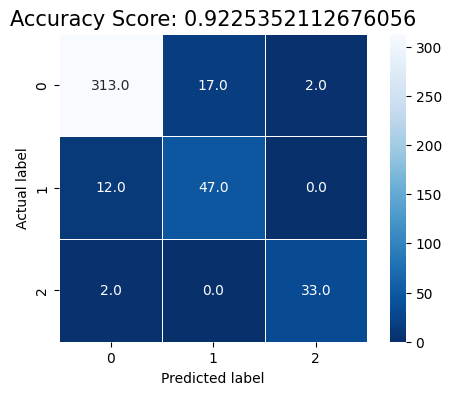

              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       332
         2.0       0.73      0.80      0.76        59
         3.0       0.94      0.94      0.94        35

    accuracy                           0.92       426
   macro avg       0.88      0.89      0.89       426
weighted avg       0.93      0.92      0.92       426



In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

tree_clf = DecisionTreeClassifier(random_state=0)

clf = tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

score = tree_clf.score(X_test, y_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

plt.show()
print(metrics.classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import tree


# Define the parameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5],                      #The maximum depth of the tree
    'criterion': ['gini', 'entropy', 'log_loss'],   #The function to measure the quality of a split
    'max_features': ['sqrt', 'log2']                #he number of features to consider when looking for the best split, sqrt(n_features), log2(n_features)
}


# Create a randomized search object   --    precision_macro
grid_search =GridSearchCV(tree_clf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the randomized search object to the data
grid_search.fit(X_train, y_train)
# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

#Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt'}

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt'}


###### KNN (15 pts)

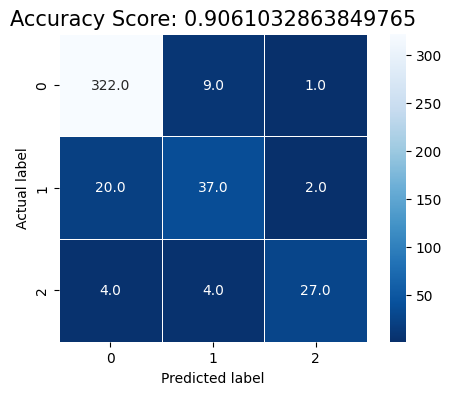

              precision    recall  f1-score   support

         1.0       0.93      0.97      0.95       332
         2.0       0.74      0.63      0.68        59
         3.0       0.90      0.77      0.83        35

    accuracy                           0.91       426
   macro avg       0.86      0.79      0.82       426
weighted avg       0.90      0.91      0.90       426



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh_clf = KNeighborsClassifier(n_neighbors=3)

neigh_clf.fit(X_train, y_train)

y_pred = neigh_clf.predict(X_test)


# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

score = neigh_clf.score(X_test, y_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

plt.show()
print(metrics.classification_report(y_test, y_pred))

In [ ]:
# Define the KNN model
neigh_clf_grid = KNeighborsClassifier(n_neighbors=3)

#ceating Parameter grid
param_grid = {'n_neighbors': [3, 4, 5, 6, 7],
              'weights': ['uniform', 'distance']
              }

# Perform grid search   --    precision_macro,
grid_search = GridSearchCV(neigh_clf_grid, param_grid, cv=5, scoring='accuracy')  #weighted, recall_macro  --> cross_val_score(clf, X, y, cv=5, scoring='recall_macro')
grid_search.fit(X_train, y_train)


# Get the best hyperparameters
best_params = grid_search.best_params_
# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

#Best hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}

Best hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}


###### SVC (15 pts)

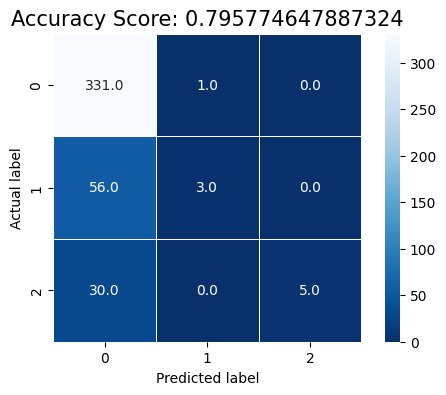

              precision    recall  f1-score   support

         1.0       0.79      1.00      0.88       332
         2.0       0.75      0.05      0.10        59
         3.0       1.00      0.14      0.25        35

    accuracy                           0.80       426
   macro avg       0.85      0.40      0.41       426
weighted avg       0.80      0.80      0.72       426



In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto')

svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)


# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

score = svm_clf.score(X_test, y_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

plt.show()
print(metrics.classification_report(y_test, y_pred))

In [ ]:
C = [] #C: from 0.1 to 1, step = 0.3
i = 0.1
while i<=1:
  C.append(round(i,1))
  i += 0.3

C

[0.1, 0.4, 0.7, 1.0]

In [ ]:
# Define the SVM SVC model

svm_clf = SVC()   #gamma if ‘auto’, uses 1 / n_features; if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var())

#ceating Parameter grid
param_grid = {'degree': [2, 3, 4, 5],           #Degree of the polynomial kernel function (‘poly’) [2, 3, 4, 5]
              'C': C,                           #Regularization parameter. The strength of the regularization is inversely proportional to C
              'kernel': ['poly', 'rbf']         #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'. ['poly', 'rbf']
              }


# Perform grid search   --    precision_macro,
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy')  #weighted, recall_macro  --> cross_val_score(clf, X, y, cv=5, scoring='recall_macro')
grid_search.fit(X_train, y_train)


# Get the best hyperparameters
best_params = grid_search.best_params_
# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

#Best hyperparameters: {'C': 0.7, 'degree': 5, 'kernel': 'poly'}

Best hyperparameters: {'C': 0.7, 'degree': 5, 'kernel': 'poly'}


###### SGD (15 pts)

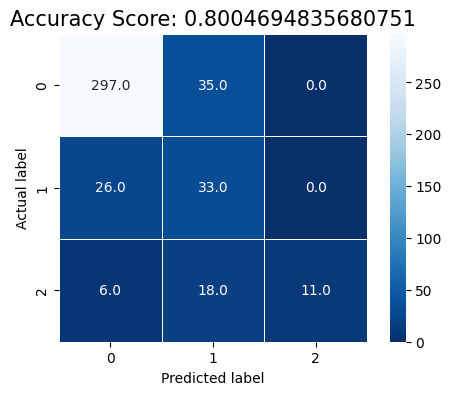

              precision    recall  f1-score   support

         1.0       0.90      0.89      0.90       332
         2.0       0.38      0.56      0.46        59
         3.0       1.00      0.31      0.48        35

    accuracy                           0.80       426
   macro avg       0.76      0.59      0.61       426
weighted avg       0.84      0.80      0.80       426



In [ ]:
sgd_clf = SGDClassifier()
#max_iter=1000, tol=1e-3
sgd_clf.fit(X_train, y_train)

y_pred = sgd_clf.predict(X_test)


# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
score = sgd_clf.score(X_test, y_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

plt.show()
print(metrics.classification_report(y_test, y_pred))

In [ ]:
# Define the SGD model

sgd_clf = SGDClassifier()

#ceating Parameter grid
param_grid = {'loss': ['hinge', 'log_loss', 'modified_huber']           #The loss function to be used
              }
#'hinge' gives a linear SVM
#'log_loss' gives logistic regression, a probabilistic classifier
#'modified_huber' is another smooth loss that brings tolerance to outliers as well as probability estimates

# Perform grid search   --    precision_macro,
grid_search = GridSearchCV(sgd_clf, param_grid, cv=5, scoring='accuracy')  #weighted, recall_macro  --> cross_val_score(clf, X, y, cv=5, scoring='recall_macro')
grid_search.fit(X_train, y_train)


# Get the best hyperparameters
best_params = grid_search.best_params_
# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

#Best hyperparameters: {'loss': 'hinge'}


Best hyperparameters: {'loss': 'hinge'}


### Part 2: Compare 5 different models' accuracies (25 pts)

#### Use the best hyperparameters returned from GridSearchCV to re-train the models, and compare the accuracies of all 5 models.
The followings include hyperparameters of mentioned models:
* Logistic Regression:
    * C: from 0.1 to 1, step = 0.3
    * multi_class: auto, ovr, multinomial
    * solver: newton-cg
* Decision Tree:
    * criterion: gini, entropy, log_loss
    * max_features: sqrt, log2
    * max_depth: 2 to 5
* KNN:
    * n_neighbors: 3 to 7
    * weights: uniform, distance
* SVC:
    * degree: 2 to 5
    * C: 0.1 to 1, step = 0.3
    * kernel: poly, rbf
* SGD:
    * loss: hinge, log_loss, modified_huber

Accuracy of best Logistic Regression: 0.8943661971830986
Accuracy of best Decision Tree: 0.8615023474178404
Accuracy of best KNN: 0.9084507042253521
Accuracy of best SVC: 0.8849765258215962
Accuracy of best SGD: 0.8192488262910798


In [ ]:
#LR
#Best hyperparameters: {'C': 1.0, 'multi_class': 'ovr', 'solver': 'newton-cg'}
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(C=1, solver="newton-cg", multi_class="ovr")
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
print(f'Accuracy of best Logistic Regression: {metrics.accuracy_score(y_test, y_pred)}')

#DT
#Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt'}
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, max_features='sqrt')
clf = tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
print(f'Accuracy of best Decision Tree: {metrics.accuracy_score(y_test, y_pred)}')

#KNN
#Best hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}
from sklearn.neighbors import KNeighborsClassifier
neigh_clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh_clf.fit(X_train, y_train)
y_pred = neigh_clf.predict(X_test)
print(f'Accuracy of best KNN: {metrics.accuracy_score(y_test, y_pred)}')

#SVC
#Best hyperparameters: {'C': 0.7, 'degree': 5, 'kernel': 'poly'}
from sklearn.svm import SVC
svm_clf = SVC(C=0.7, degree=5, kernel='poly')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print(f'Accuracy of best SVC: {metrics.accuracy_score(y_test, y_pred)}')

#SGD
#Best hyperparameters: {'loss': 'hinge'}
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss='hinge')
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)
print(f'Accuracy of best SGD: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy of best Logistic Regression: 0.8943661971830986
Accuracy of best Decision Tree: 0.892018779342723
Accuracy of best KNN: 0.9084507042253521
Accuracy of best SVC: 0.8849765258215962
Accuracy of best SGD: 0.8779342723004695
